<a href="https://colab.research.google.com/github/Janies-Garcia-Velasco/simulacion-n-2/blob/main/funciones_bivariadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install scipy

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
from itertools import accumulate
from mpl_toolkits.mplot3d import Axes3D

In [23]:
# Distribución de Cauchy bivariada
def cauchy_bivariada(X, Y, gamma_x=1.0, gamma_y=1.0, x0=0.0, y0=0.0):
    X_desplazado = X - x0
    Y_desplazado = Y - y0
    return (1 / (np.pi * gamma_x * (1 + (X_desplazado / gamma_x)**2))) * (1 / (np.pi * gamma_y * (1 + (Y_desplazado / gamma_y)**2)))

# Función para graficar la distribución y el histograma
def graficar_distribucion(muestras, titulo):
    sns.set_style('white')
    plt.figure(figsize=(10, 8))

    # Gráfico de KDE (estimación de densidad)
    sns.kdeplot(x=muestras[:, 0], y=muestras[:, 1], cmap="BuPu", shade=True, n_levels=15)

    # Gráfico de dispersión de las muestras
    plt.scatter(muestras[:, 0], muestras[:, 1], c='r', s=5)
    plt.title(titulo)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# Función para calcular las estadísticas de las muestras y compararlas con los valores analíticos
def analizar_muestras(muestras, media_analitica, desviacion_analitica):
    media_muestra = np.mean(muestras, axis=0)
    desviacion_muestra = np.std(muestras, axis=0)

    print(f"Media de la muestra: {media_muestra}")
    print(f"Desviación estándar de la muestra: {desviacion_muestra}")

    print(f"Media teórica: {media_analitica}")
    print(f"Desviación estándar teórica: {desviacion_analitica}")

    print("\n")

# Algoritmo de Metropolis-Hastings
def metropolis_hastings(p, n, x0, y0, paso):
    x, y = x0, y0
    muestras = np.zeros((n, 2))

    for i in range(n):
        x_propuesto, y_propuesto = np.array([x, y]) + np.random.normal(scale=paso, size=2)

        if np.random.rand() < p(x_propuesto, y_propuesto) / p(x, y):
            x, y = x_propuesto, y_propuesto

        muestras[i] = np.array([x, y])

    return muestras

<ipython-input-23-85508a135b49>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=muestras[:, 0], y=muestras[:, 1], cmap="BuPu", shade=True, n_levels=15)


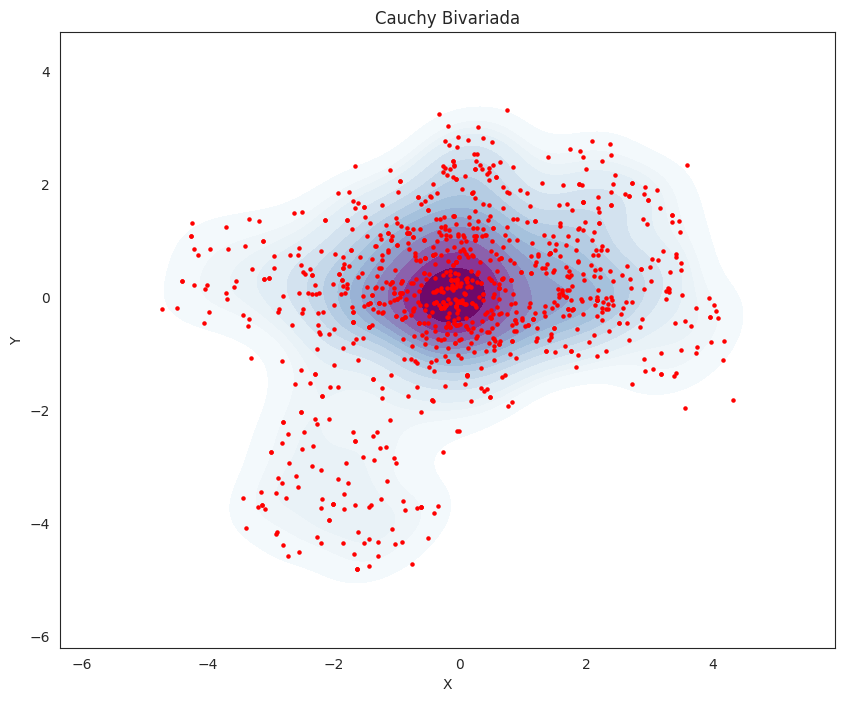

Media de la muestra: [-0.02970648 -0.0274936 ]
Desviación estándar de la muestra: [1.70801326 1.46378073]
Media teórica: [0, 0]
Desviación estándar teórica: [inf, inf]




In [24]:
# 1. Distribución de Cauchy Bivariada
def ptarget_cauchy(x, y):
    return cauchy_bivariada(x, y)

muestras_cauchy = metropolis_hastings(ptarget_cauchy, 1000, 0, 0, 0.4)
graficar_distribucion(muestras_cauchy, "Cauchy Bivariada")
analizar_muestras(muestras_cauchy, [0, 0], [np.inf, np.inf])  # La media y desviación estándar de Cauchy son indefinidas.

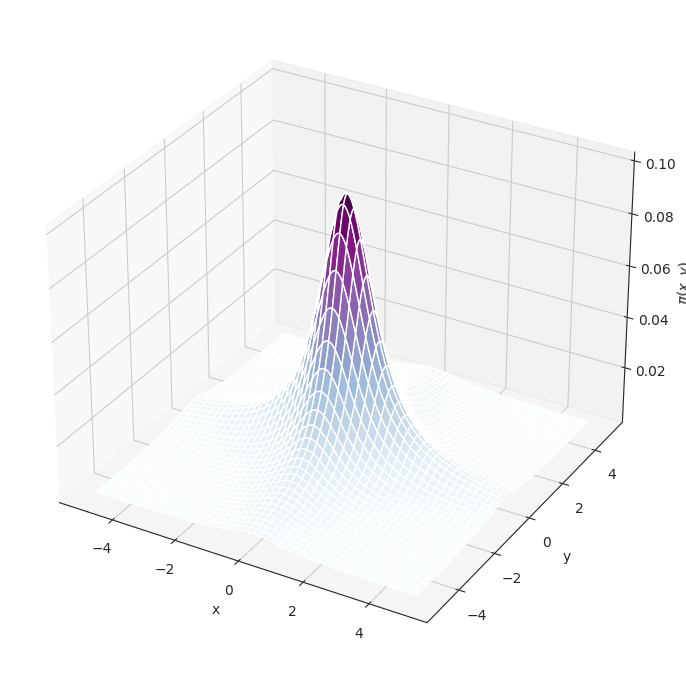

In [25]:
# create grid for 3D plot
x, y = np.linspace(-5, 5, 200), np.linspace(-5, 5, 200)
X,Y = np.meshgrid(x, y)

#generando cauchy bivariable
Z=ptarget_cauchy(X,Y)

# plot surface in 3D
fig = plt.figure(figsize=(12,8.5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap= 'BuPu')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\pi(x,y)$')
plt.show()

<ipython-input-23-85508a135b49>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=muestras[:, 0], y=muestras[:, 1], cmap="BuPu", shade=True, n_levels=15)


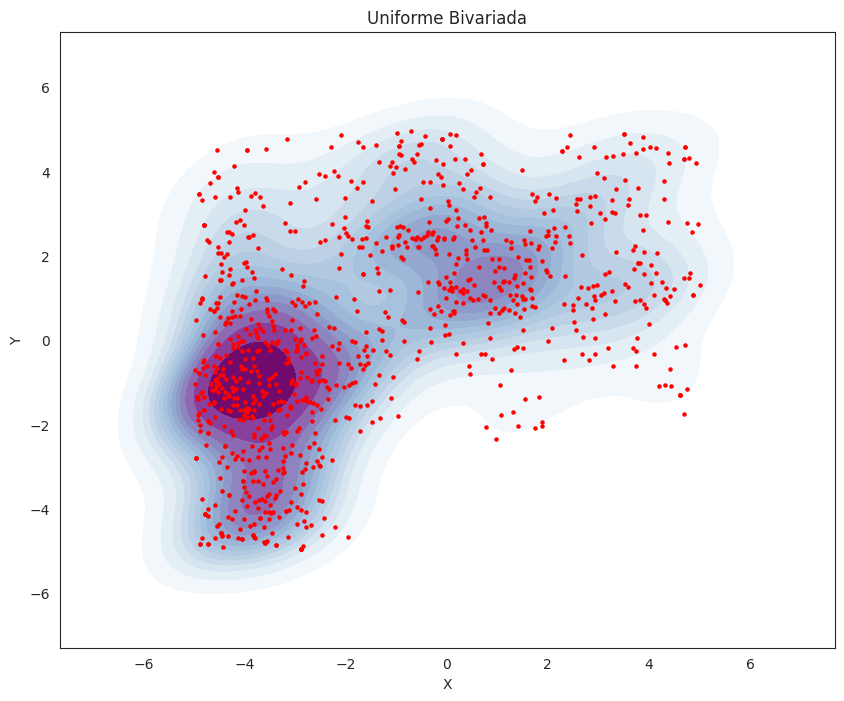

Media de la muestra: [-1.4875966   0.25541636]
Desviación estándar de la muestra: [2.8182912  2.47844784]
Media teórica: [0, 0]
Desviación estándar teórica: [0.28867513459481287, 0.28867513459481287]




In [27]:
# 2. Distribución Uniforme Bivariada
def ptarget_uniforme(x, y):
    if -5 <= x <= 5 and -5 <= y <= 5:
        return 1/100
    return 0

muestras_uniforme = metropolis_hastings(ptarget_uniforme, 1000, 0, 0, 0.5)
graficar_distribucion(muestras_uniforme, "Uniforme Bivariada")
analizar_muestras(muestras_uniforme, [0, 0], [np.sqrt(1/12), np.sqrt(1/12)])

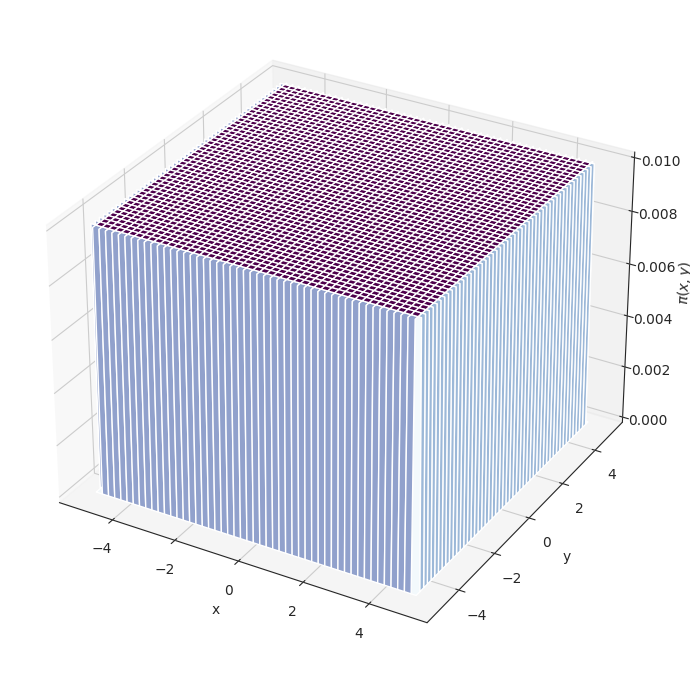

In [28]:
# create grid for 3D plot
x, y = np.linspace(-5, 5, 200), np.linspace(-5, 5, 200)
X,Y = np.meshgrid(x, y)

# generating bivariate uniform distribution
Z = np.zeros_like(X)
Z[(X>-5) & (X<5) & (Y>-5) & (Y<5)] = 1/100

# plot surface in 3D
fig = plt.figure(figsize=(12,8.5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap= 'BuPu')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\pi(x,y)$')
plt.show()

<ipython-input-23-85508a135b49>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=muestras[:, 0], y=muestras[:, 1], cmap="BuPu", shade=True, n_levels=15)


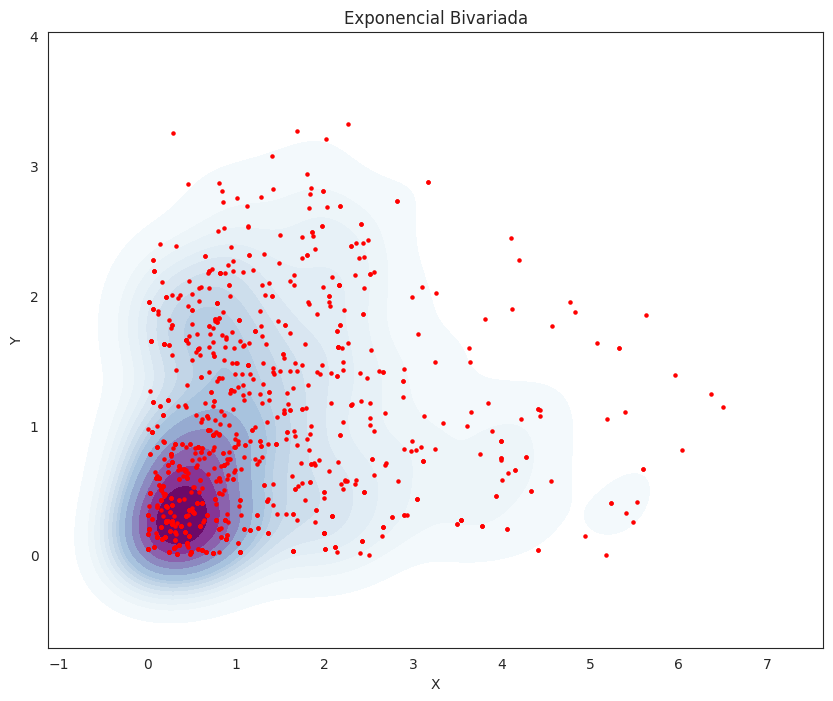

Media de la muestra: [1.2119581  0.92632637]
Desviación estándar de la muestra: [1.18623305 0.75229617]
Media teórica: [1, 1]
Desviación estándar teórica: [1, 1]




In [29]:
# 3. Distribución Exponencial Bivariada
def ptarget_exponencial(x, y):
    return st.expon.pdf(x) * st.expon.pdf(y)

muestras_exponencial = metropolis_hastings(ptarget_exponencial, 1000, 1, 1, 0.5)
graficar_distribucion(muestras_exponencial, "Exponencial Bivariada")
analizar_muestras(muestras_exponencial, [1, 1], [1, 1])


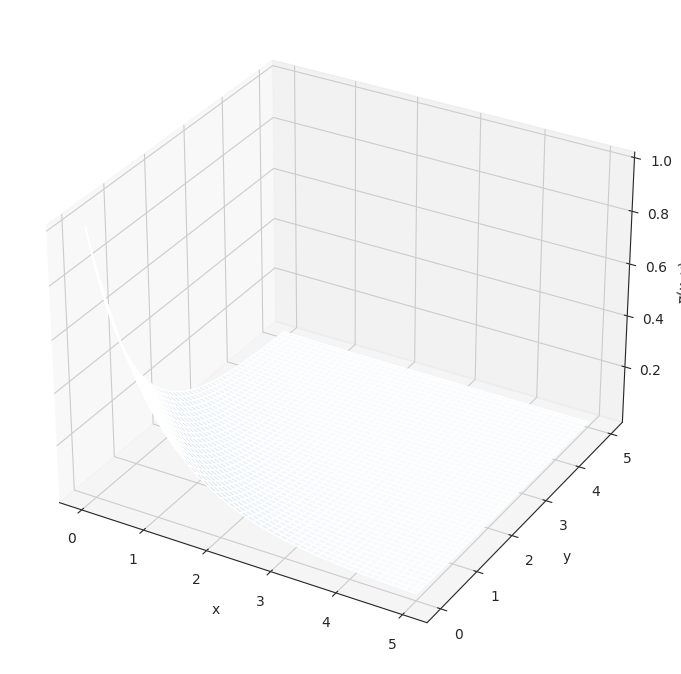

In [30]:
# create grid for 3D plot
x, y = np.linspace(0, 5, 200), np.linspace(0, 5, 200)
X,Y = np.meshgrid(x, y)

# generating bivariate exponential distribution
Z = ptarget_exponencial(X,Y)

# plot surface in 3D
fig = plt.figure(figsize=(12,8.5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap= 'BuPu')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\pi(x,y)$')
plt.show()